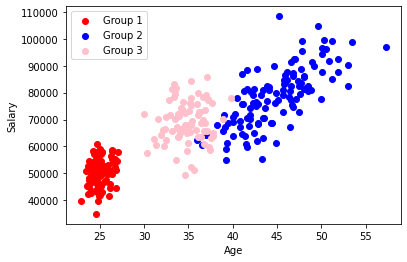

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Create covariance matrix from std devs + correlation
def covariance_matrix(std_dev_1,std_dev_2,correlation):
    return [[std_dev_1 ** 2, correlation * std_dev_1 * std_dev_2], 
           [correlation * std_dev_1 * std_dev_2, std_dev_2 ** 2]]

# Return a bivariate sample given means/std dev/correlation
def age_salary_sample(distribution_params,sample_size):
    mean = [distribution_params["age_mean"], distribution_params["salary_mean"]]
    cov = covariance_matrix(distribution_params["age_std_dev"],distribution_params["salary_std_dev"],
                            distribution_params["age_salary_correlation"])
    return np.random.multivariate_normal(mean, cov, sample_size).T

# Define the characteristics of our age/salary distribution
age_salary_distribution_1 = {"age_mean":25,"salary_mean":50000,
                             "age_std_dev":1,"salary_std_dev":5000,"age_salary_correlation":0.3}

age_salary_distribution_2 = {"age_mean":45,"salary_mean":80000,
                             "age_std_dev":4,"salary_std_dev":10000,"age_salary_correlation":0.7}

age_salary_distribution_3 = {"age_mean":35,"salary_mean":70000,
                             "age_std_dev":2,"salary_std_dev":9000,"age_salary_correlation":0.1}

distribution_data = [age_salary_distribution_1,age_salary_distribution_2,age_salary_distribution_3]

# Sample age/salary data for each distributions
group_1_ages,group_1_salaries = age_salary_sample(age_salary_distribution_1,sample_size=100)
group_2_ages,group_2_salaries = age_salary_sample(age_salary_distribution_2,sample_size=120)
group_3_ages,group_3_salaries = age_salary_sample(age_salary_distribution_3,sample_size=80)

# Plot the sample data
group_1_colour, group_2_colour, group_3_colour ='red','blue', 'pink'
plt.xlabel('Age',fontsize=10)
plt.ylabel("Salary",fontsize=10) 

plt.scatter(group_1_ages,group_1_salaries,c=group_1_colour,label="Group 1")
plt.scatter(group_2_ages,group_2_salaries,c=group_2_colour,label="Group 2")
plt.scatter(group_3_ages,group_3_salaries,c=group_3_colour,label="Group 3")

plt.legend(loc='upper left')
plt.show()

In [116]:
from sklearn.mixture import GaussianMixture

ages=np.concatenate([group_1_ages,group_2_ages,group_3_ages])
salaries=np.concatenate([group_1_salaries,group_2_salaries,group_3_salaries])
age_salary_matrix=np.matrix([ages,salaries]).T

# Find the optimal number of clusters
optimal_cluster_count = 1
best_bic_score = GaussianMixture(1).fit(age_salary_matrix).bic(age_salary_matrix)

for count in range(1,20):
    gm=GaussianMixture(count)
    gm.fit(age_salary_matrix)
    if gm.bic(age_salary_matrix) < best_bic_score:
        best_bic_score = gm.bic(age_salary_matrix)
        optimal_cluster_count = count

print("Optimal cluster count found to be "+str(optimal_cluster_count))

Optimal cluster count found to be 3


In [126]:
# Generate the model using the optimal no of clusters
# Look at the estimates for the distribution parameters for each cluster in the group
print("Distribution parameter estimates")

gm = GaussianMixture(optimal_cluster_count)
gm.fit(age_salary_matrix)

estimates = []
# Index
for index in range(0,optimal_cluster_count):
    estimated_mean_age = round(gm.means_[index][0],2)
    estimated_mean_salary = round(gm.means_[index][1],0)
    estimated_age_std_dev = round(math.sqrt(gm.covariances_[index][0][0]),2)
    estimated_salary_std_dev = round(math.sqrt(gm.covariances_[index][1][1]),0)
    estimated_correlation = round(gm.covariances_[index][0][1] / ( estimated_age_std_dev * estimated_salary_std_dev ),3)
    row = [estimated_mean_age,estimated_mean_salary,estimated_age_std_dev,estimated_salary_std_dev,estimated_correlation]
    estimates.append(row)
    
pd.DataFrame(estimates,columns = ["Mean Age","Mean Salary","Age Std Dev","Salary Std Dev","Correlation"])    


Distribution parameter estimates


,Mean Age,Mean Salary,Age Std Dev,Salary Std Dev,Correlation
0,25.07,50078.0,1.02,4415.0,0.161
1,46.12,82143.0,3.69,9193.0,0.628
2,35.15,68644.0,2.29,8233.0,0.083


In [128]:
# Look at actual parameter values
print("Actual parameter values")
distribution_data_as_rows = []
for distribution in distribution_data:
    row = [distribution['age_mean'],distribution['salary_mean'],distribution['age_std_dev'],
                             distribution['salary_std_dev'],distribution['age_salary_correlation']]
    distribution_data_as_rows.append(row)

pd.DataFrame(distribution_data_as_rows,columns = ["Mean Age","Mean Salary","Age Std Dev","Salary Std Dev","Correlation"])    

Actual parameter values


,Mean Age,Mean Salary,Age Std Dev,Salary Std Dev,Correlation
0,25,50000,1,5000,0.3
1,45,80000,4,10000,0.7
2,35,70000,2,9000,0.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random((8, 8))
data
#plt.imshow(data, cmap='cool', interpolation='nearest')
#plt.show()

array([[0.1235296 , 0.28143319, 0.93611504, 0.57120465, 0.5882942 ,
        0.72091747, 0.64770761, 0.59126318],
       [0.25276498, 0.95220179, 0.03413053, 0.24486661, 0.41590393,
        0.15843718, 0.82675493, 0.23860193],
       [0.74709916, 0.430141  , 0.84019605, 0.04163646, 0.57137101,
        0.00506305, 0.24734585, 0.65627884],
       [0.93657427, 0.7214444 , 0.71045082, 0.73731369, 0.24314385,
        0.73780869, 0.06610476, 0.39015405],
       [0.97177444, 0.99274824, 0.86111641, 0.09845132, 0.43248463,
        0.4848596 , 0.66883395, 0.39908826],
       [0.92683195, 0.52600525, 0.25066275, 0.1926776 , 0.24573265,
        0.96394284, 0.29304076, 0.6752291 ],
       [0.59096358, 0.66628773, 0.98787724, 0.62243121, 0.90703496,
        0.75844319, 0.91425896, 0.98997837],
       [0.47465809, 0.81914252, 0.28340598, 0.65108688, 0.63284531,
        0.93537785, 0.86758447, 0.31115807]])

In [18]:
group_1_ages

array([24.64954645, 23.6338693 , 24.8304964 , 24.77128239, 24.48659389,
       24.72233416, 26.71103168, 25.16751941, 25.65845863, 25.2420635 ,
       24.00798848, 24.13021762, 24.82081154, 24.24866617, 25.17828079,
       26.81772932, 26.43590231, 24.01712364, 26.40061458, 26.08768898,
       25.01088505, 25.05147769, 26.4430464 , 25.75833996, 24.26892013,
       24.66735415, 24.64464682, 24.08545924, 26.1021517 , 25.43358774,
       26.99894177, 24.42921216, 25.24976242, 24.94193059, 26.03392773,
       23.48890177, 25.05675704, 25.16384816, 23.79395515, 23.73114369,
       24.71110658, 25.98254931, 23.83263816, 26.51164997, 25.46754983,
       24.92794932, 23.72187235, 26.31799444, 25.2196624 , 25.29965203,
       24.80690115, 24.68460641, 26.69028438, 24.61413158, 24.10272565,
       24.61408502, 25.41624523, 24.43996032, 26.31098665, 24.96062519,
       25.30215711, 26.52405577, 24.86782085, 24.66764257, 23.68983212,
       26.8031266 , 24.84084055, 25.91633174, 25.36266999, 24.64

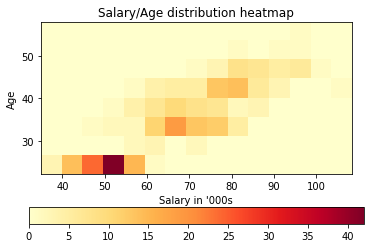

In [83]:
import math

ages = numpy.append(group_1_ages,numpy.append(group_2_ages,group_3_ages))
salaries = numpy.append(group_1_salaries,numpy.append(group_2_salaries,group_3_salaries))
age_min = int(numpy.amin(ages))
age_max = math.ceil(numpy.amax(ages))
age_bucket_size = 5
age_buckets = math.ceil((age_max - age_min)/age_bucket_size)
salary_min = int(numpy.amin(salaries))
salary_max = math.ceil(numpy.amax(salaries))
salary_bucket_size = 5000
salary_buckets = math.ceil((salary_max - salary_min)/salary_bucket_size)

x = [[0 for i in range(salary_buckets)] for j in range(age_buckets)]

for i in range(len(ages)):
    age_bucket = math.floor((ages[i] - age_min)/age_bucket_size)
    salary_bucket = math.floor((salaries[i] - salary_min)/salary_bucket_size)
    x[age_bucket][salary_bucket] += 1

extent=[salary_min/1000,salary_max/1000,age_min,age_max]
plt.title("Salary/Age distribution heatmap")
plt.imshow(x, cmap='YlOrRd', interpolation='nearest',extent=extent,origin="lower")
plt.colorbar(orientation="horizontal")
plt.xlabel("Salary in '000s")

plt.ylabel("Age")
plt.show()